Write a puzzle interpreter

store a horse puzzle as a spreadsheet.

Text(0.5, 1.0, 'water spots')

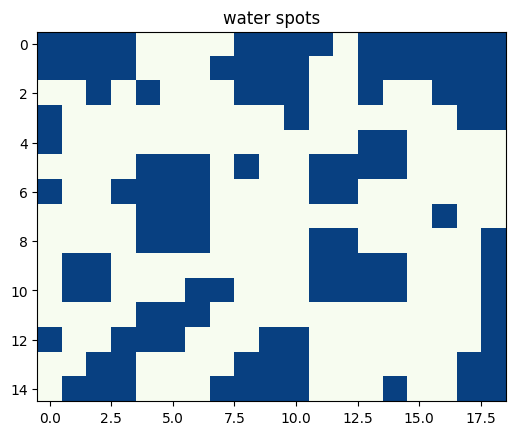

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp as pl
from matplotlib.patches import Rectangle
import numpy as np

day2_file_path = './maps/day1.csv'

puzz = pd.read_csv(day2_file_path, header=None, dtype = str)
puzz.fillna("0", inplace = True)

water = puzz.replace({'s':'0'}).astype(int).to_numpy()
plt.imshow(water, cmap='GnBu')
plt.title("water spots")

Set up variables and constraints
---

An array `wall[i, j]` to store whether we build a wall at i,j
- `wall.sum() <= 14` Wall budget
- True for build a wall, False for leave alone

An array `reach[i, j]` whether a square is reachable from the horse.
- want to maximize sum(reach)!!


In [14]:
wall_budget = 10

# mark water walls
water = puzz.replace({'s':0}).astype(int).to_numpy()

#note the source horse location
# source = puzz.replace({'s':1,'1':0}).astype(int).to_numpy()
s_col = 9
s_row = 7

#get dimensions
no_rows, no_cols = water.shape

#create model
model = pl.LpProblem("Enclose.Horse", pl.LpMaximize)

#create variables to solve
#whether to build a wall at this node
build_wall = {
    (row, col):pl.LpVariable(
        f"wall_{row}_{col}",
        0,
        1,
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#define reachability from source as a variable
reachable = {
    (row,col):pl.LpVariable(
        f"reach_{row}_{col}",
        0,
        1, 
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#force reachability at the source
model += reachable[(s_row, s_col)] == 1
# #force no wall at the source
model += build_wall[(s_row, s_col)] == 0

# no need to add a sink at infinity. setting all edges as unreachable handles this. assume that all squares
#outside the game board are clear, no walls.
# #add in a sink at infinity
# reachable.update(
#     f"reach_inf",
#     0,
#     1,
#     cat = "Binary"
# )



#objective: maximize reachability
# model += pl.lpSum(reachable.values())
model.setObjective(pl.lpSum(reachable.values()))

#budget
model += pl.lpSum(build_wall.values()) <= wall_budget

#square-local constraints
for col in range(no_cols):
    for row in range(no_rows):
        model += reachable[(row,col)] + build_wall[(row,col)] <= 1
        if water[row,col]:
            #force nonreachability to water spots
            model += reachable[(row,col)] == 0
            #force nonbuildability to water spots
            model += build_wall[(row,col)] == 0
        #force nonreachability to all edges
        if row == 0 or row == no_rows-1 or col == 0 or col == no_cols-1:
            model += reachable[(row,col)] == 0

#intersquare constraints
for col in range(no_cols-1):
    for row in range(no_rows-1):
        #two adjacent BUILDABLE squares cannot both be reached if a wall occupies either of them
        if not water[(row,col)]:
            if not water[(row,col+1)]:
                model += reachable[(row,col+1)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
                model += reachable[(row,col)] - reachable[(row,col+1)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
            if not water[(row+1,col)]:
                model += reachable[(row+1,col)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]
                model += reachable[(row,col)] - reachable[(row+1,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]

model.solve(pl.PULP_CBC_CMD(msg = True))

1

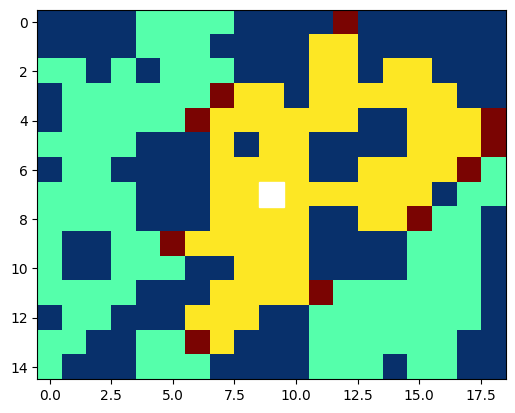

In [15]:

#make an np array of the resulting pulp variables
wall_np = np.array([
    [
        pl.value(
            build_wall[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])
reachable_np = np.array([
    [
        pl.value(
           reachable[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])

#plot the result
fig, ax = plt.subplots()

ax.set_facecolor("#55FFAB")

water_masked = np.ma.masked_where(water == 0, water)
wall_masked = np.ma.masked_where(wall_np == 0, wall_np)
reachable_masked = np.ma.masked_where(reachable_np == 0, reachable_np)

ax.imshow(water_masked, vmin = 0, vmax = 1, cmap = "Blues")
ax.imshow(wall_masked, vmin = 0, vmax = 1, cmap = "turbo")
ax.imshow(reachable_masked, vmin=0, vmax=1)

#prinmt da horse
ax.add_patch(
    Rectangle(
        (s_col-.5,s_row-.5),
        1,
        1,
        color = 'white'
    )
)

plt.show()

Day 2
---

In [ ]:
puzz.iwh

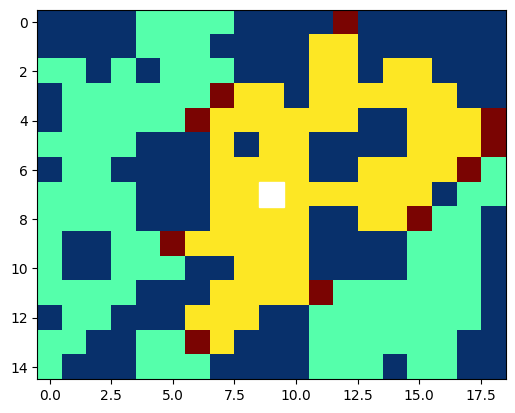

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp as pl
from matplotlib.patches import Rectangle
import numpy as np

day2_file_path = './maps/day1.csv'

wall_budget = 10

#note the source horse location
# source = puzz.replace({'s':1,'1':0}).astype(int).to_numpy()
s_col = 9
s_row = 7


puzz = pd.read_csv(day2_file_path, header=None, dtype = str)
puzz.fillna("0", inplace = True)

water = puzz.replace({'s':'0'}).astype(int).to_numpy()
# plt.imshow(water, cmap='GnBu')
# plt.title("water spots")




# mark water walls
water = puzz.replace({'s':0}).astype(int).to_numpy()


#get dimensions
no_rows, no_cols = water.shape

#create model
model = pl.LpProblem("Enclose.Horse", pl.LpMaximize)

#create variables to solve
#whether to build a wall at this node
build_wall = {
    (row, col):pl.LpVariable(
        f"wall_{row}_{col}",
        0,
        1,
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#define reachability from source as a variable
reachable = {
    (row,col):pl.LpVariable(
        f"reach_{row}_{col}",
        0,
        1, 
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#force reachability at the source
model += reachable[(s_row, s_col)] == 1
# #force no wall at the source
model += build_wall[(s_row, s_col)] == 0

# no need to add a sink at infinity. setting all edges as unreachable handles this. assume that all squares
#outside the game board are clear, no walls.
# #add in a sink at infinity
# reachable.update(
#     f"reach_inf",
#     0,
#     1,
#     cat = "Binary"
# )



#objective: maximize reachability
# model += pl.lpSum(reachable.values())
model.setObjective(pl.lpSum(reachable.values()))

#budget
model += pl.lpSum(build_wall.values()) <= wall_budget

#square-local constraints
for col in range(no_cols):
    for row in range(no_rows):
        model += reachable[(row,col)] + build_wall[(row,col)] <= 1
        if water[row,col]:
            #force nonreachability to water spots
            model += reachable[(row,col)] == 0
            #force nonbuildability to water spots
            model += build_wall[(row,col)] == 0
        #force nonreachability to all edges
        if row == 0 or row == no_rows-1 or col == 0 or col == no_cols-1:
            model += reachable[(row,col)] == 0

#intersquare constraints
for col in range(no_cols-1):
    for row in range(no_rows-1):
        #two adjacent BUILDABLE squares cannot both be reached if a wall occupies either of them
        if not water[(row,col)]:
            if not water[(row,col+1)]:
                model += reachable[(row,col+1)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
                model += reachable[(row,col)] - reachable[(row,col+1)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
            if not water[(row+1,col)]:
                model += reachable[(row+1,col)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]
                model += reachable[(row,col)] - reachable[(row+1,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]

model.solve(pl.PULP_CBC_CMD(msg = True))







#make an np array of the resulting pulp variables
wall_np = np.array([
    [
        pl.value(
            build_wall[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])
reachable_np = np.array([
    [
        pl.value(
           reachable[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])

#plot the result
fig, ax = plt.subplots()

ax.set_facecolor("#55FFAB")

water_masked = np.ma.masked_where(water == 0, water)
wall_masked = np.ma.masked_where(wall_np == 0, wall_np)
reachable_masked = np.ma.masked_where(reachable_np == 0, reachable_np)

ax.imshow(water_masked, vmin = 0, vmax = 1, cmap = "Blues")
ax.imshow(wall_masked, vmin = 0, vmax = 1, cmap = "turbo")
ax.imshow(reachable_masked, vmin=0, vmax=1)

#prinmt da horse
ax.add_patch(
    Rectangle(
        (s_col-.5,s_row-.5),
        1,
        1,
        color = 'white'
    )
)

plt.show()

model_status = pl.LpStatus[model.status] 
assert model_status == 'Optimal', f"Model status: {model_status}"

Day 3
---

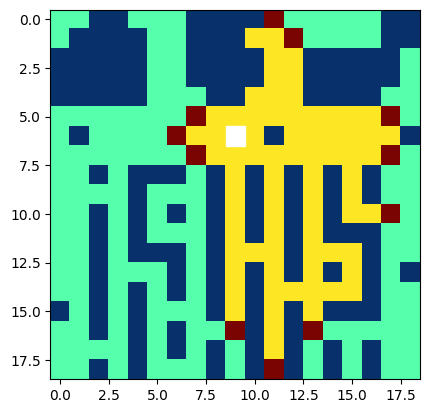

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp as pl
from matplotlib.patches import Rectangle
import numpy as np

day2_file_path = './maps/day3.csv'

wall_budget = 11

#note the source horse location
# source = puzz.replace({'s':1,'1':0}).astype(int).to_numpy()
s_col = 9
s_row = 6


puzz = pd.read_csv(day2_file_path, header=None, dtype = str)
puzz.fillna("0", inplace = True)

water = puzz.replace({'s':'0'}).astype(int).to_numpy()
# plt.imshow(water, cmap='GnBu')
# plt.title("water spots")




# mark water walls
water = puzz.replace({'s':0}).astype(int).to_numpy()


#get dimensions
no_rows, no_cols = water.shape

#create model
model = pl.LpProblem("Enclose.Horse", pl.LpMaximize)

#create variables to solve
#whether to build a wall at this node
build_wall = {
    (row, col):pl.LpVariable(
        f"wall_{row}_{col}",
        0,
        1,
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#define reachability from source as a variable
reachable = {
    (row,col):pl.LpVariable(
        f"reach_{row}_{col}",
        0,
        1, 
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#force reachability at the source
model += reachable[(s_row, s_col)] == 1
# #force no wall at the source
model += build_wall[(s_row, s_col)] == 0

# no need to add a sink at infinity. setting all edges as unreachable handles this. assume that all squares
#outside the game board are clear, no walls.
# #add in a sink at infinity
# reachable.update(
#     f"reach_inf",
#     0,
#     1,
#     cat = "Binary"
# )



#objective: maximize reachability
# model += pl.lpSum(reachable.values())
model.setObjective(pl.lpSum(reachable.values()))

#budget
model += pl.lpSum(build_wall.values()) <= wall_budget

#square-local constraints
for col in range(no_cols):
    for row in range(no_rows):
        model += reachable[(row,col)] + build_wall[(row,col)] <= 1
        if water[row,col]:
            #force nonreachability to water spots
            model += reachable[(row,col)] == 0
            #force nonbuildability to water spots
            model += build_wall[(row,col)] == 0
        #force nonreachability to all edges
        if row == 0 or row == no_rows-1 or col == 0 or col == no_cols-1:
            model += reachable[(row,col)] == 0

#intersquare constraints
for col in range(no_cols-1):
    for row in range(no_rows-1):
        #two adjacent BUILDABLE squares cannot both be reached if a wall occupies either of them
        if not water[(row,col)]:
            if not water[(row,col+1)]:
                model += reachable[(row,col+1)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
                model += reachable[(row,col)] - reachable[(row,col+1)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
            if not water[(row+1,col)]:
                model += reachable[(row+1,col)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]
                model += reachable[(row,col)] - reachable[(row+1,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]

model.solve(pl.PULP_CBC_CMD(msg = True))







#make an np array of the resulting pulp variables
wall_np = np.array([
    [
        pl.value(
            build_wall[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])
reachable_np = np.array([
    [
        pl.value(
           reachable[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])

#plot the result
fig, ax = plt.subplots()

ax.set_facecolor("#55FFAB")

water_masked = np.ma.masked_where(water == 0, water)
wall_masked = np.ma.masked_where(wall_np == 0, wall_np)
reachable_masked = np.ma.masked_where(reachable_np == 0, reachable_np)

ax.imshow(water_masked, vmin = 0, vmax = 1, cmap = "Blues")
ax.imshow(wall_masked, vmin = 0, vmax = 1, cmap = "turbo")
ax.imshow(reachable_masked, vmin=0, vmax=1)

#prinmt da horse
ax.add_patch(
    Rectangle(
        (s_col-.5,s_row-.5),
        1,
        1,
        color = 'white'
    )
)

plt.show()

model_status = pl.LpStatus[model.status] 
assert model_status == 'Optimal', f"Model status: {model_status}"

# Day 11

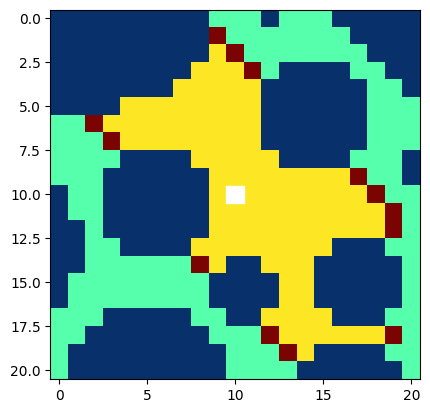

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp as pl
from matplotlib.patches import Rectangle
import numpy as np

day2_file_path = './maps/day11.csv'

wall_budget = 13

#note the source horse location
# source = puzz.replace({'s':1,'1':0}).astype(int).to_numpy()
s_col = 10
s_row = 10


puzz = pd.read_csv(day2_file_path, header=None, dtype = str)
puzz.fillna("0", inplace = True)

water = puzz.replace({'s':'0'}).astype(int).to_numpy()
# plt.imshow(water, cmap='GnBu')
# plt.title("water spots")




# mark water walls
water = puzz.replace({'s':0}).astype(int).to_numpy()


#get dimensions
no_rows, no_cols = water.shape

#create model
model = pl.LpProblem("Enclose.Horse", pl.LpMaximize)

#create variables to solve
#whether to build a wall at this node
build_wall = {
    (row, col):pl.LpVariable(
        f"wall_{row}_{col}",
        0,
        1,
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#define reachability from source as a variable
reachable = {
    (row,col):pl.LpVariable(
        f"reach_{row}_{col}",
        0,
        1, 
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#force reachability at the source
model += reachable[(s_row, s_col)] == 1
# #force no wall at the source
model += build_wall[(s_row, s_col)] == 0

# no need to add a sink at infinity. setting all edges as unreachable handles this. assume that all squares
#outside the game board are clear, no walls.
# #add in a sink at infinity
# reachable.update(
#     f"reach_inf",
#     0,
#     1,
#     cat = "Binary"
# )



#objective: maximize reachability
# model += pl.lpSum(reachable.values())
model.setObjective(pl.lpSum(reachable.values()))

#budget
model += pl.lpSum(build_wall.values()) <= wall_budget

#square-local constraints
for col in range(no_cols):
    for row in range(no_rows):
        model += reachable[(row,col)] + build_wall[(row,col)] <= 1
        if water[row,col]:
            #force nonreachability to water spots
            model += reachable[(row,col)] == 0
            #force nonbuildability to water spots
            model += build_wall[(row,col)] == 0
        #force nonreachability to all edges
        if row == 0 or row == no_rows-1 or col == 0 or col == no_cols-1:
            model += reachable[(row,col)] == 0

#intersquare constraints
for col in range(no_cols-1):
    for row in range(no_rows-1):
        #two adjacent BUILDABLE squares cannot both be reached if a wall occupies either of them
        if not water[(row,col)]:
            if not water[(row,col+1)]:
                model += reachable[(row,col+1)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
                model += reachable[(row,col)] - reachable[(row,col+1)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
            if not water[(row+1,col)]:
                model += reachable[(row+1,col)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]
                model += reachable[(row,col)] - reachable[(row+1,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]

model.solve(pl.PULP_CBC_CMD(msg = True))







#make an np array of the resulting pulp variables
wall_np = np.array([
    [
        pl.value(
            build_wall[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])
reachable_np = np.array([
    [
        pl.value(
           reachable[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])

#plot the result
fig, ax = plt.subplots()

ax.set_facecolor("#55FFAB")

water_masked = np.ma.masked_where(water == 0, water)
wall_masked = np.ma.masked_where(wall_np == 0, wall_np)
reachable_masked = np.ma.masked_where(reachable_np == 0, reachable_np)

ax.imshow(water_masked, vmin = 0, vmax = 1, cmap = "Blues")
ax.imshow(wall_masked, vmin = 0, vmax = 1, cmap = "turbo")
ax.imshow(reachable_masked, vmin=0, vmax=1)

#prinmt da horse
ax.add_patch(
    Rectangle(
        (s_col-.5,s_row-.5),
        1,
        1,
        color = 'white'
    )
)

plt.show()

model_status = pl.LpStatus[model.status] 
assert model_status == 'Optimal', f"Model status: {model_status}"

Day 4
---

Identify the source location with the s

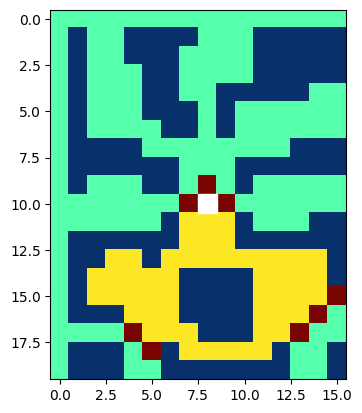

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp as pl
from matplotlib.patches import Rectangle
import numpy as np

day2_file_path = './maps/day4.csv'

wall_budget = 8

puzz = pd.read_csv(day2_file_path, header=None, dtype = str)
puzz.fillna("0", inplace = True)

#note the source horse location
# # source = puzz.replace({'s':1,'1':0}).astype(int).to_numpy()
# s_col = 10
# s_row = 10
[[s_row, s_col]] = np.argwhere(puzz == 's')

water = puzz.replace({'s':'0'}).astype(int).to_numpy()
# plt.imshow(water, cmap='GnBu')
# plt.title("water spots")




# mark water walls
water = puzz.replace({'s':0}).astype(int).to_numpy()


#get dimensions
no_rows, no_cols = water.shape

#create model
model = pl.LpProblem("Enclose.Horse", pl.LpMaximize)

#create variables to solve
#whether to build a wall at this node
build_wall = {
    (row, col):pl.LpVariable(
        f"wall_{row}_{col}",
        0,
        1,
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#define reachability from source as a variable
reachable = {
    (row,col):pl.LpVariable(
        f"reach_{row}_{col}",
        0,
        1, 
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#force reachability at the source
model += reachable[(s_row, s_col)] == 1
# #force no wall at the source
model += build_wall[(s_row, s_col)] == 0

# no need to add a sink at infinity. setting all edges as unreachable handles this. assume that all squares
#outside the game board are clear, no walls.
# #add in a sink at infinity
# reachable.update(
#     f"reach_inf",
#     0,
#     1,
#     cat = "Binary"
# )



#objective: maximize reachability
# model += pl.lpSum(reachable.values())
model.setObjective(pl.lpSum(reachable.values()))

#budget
model += pl.lpSum(build_wall.values()) <= wall_budget

#square-local constraints
for col in range(no_cols):
    for row in range(no_rows):
        model += reachable[(row,col)] + build_wall[(row,col)] <= 1
        if water[row,col]:
            #force nonreachability to water spots
            model += reachable[(row,col)] == 0
            #force nonbuildability to water spots
            model += build_wall[(row,col)] == 0
        #force nonreachability to all edges
        if row == 0 or row == no_rows-1 or col == 0 or col == no_cols-1:
            model += reachable[(row,col)] == 0

#intersquare constraints
for col in range(no_cols-1):
    for row in range(no_rows-1):
        #two adjacent BUILDABLE squares cannot both be reached if a wall occupies either of them
        if not water[(row,col)]:
            if not water[(row,col+1)]:
                model += reachable[(row,col+1)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
                model += reachable[(row,col)] - reachable[(row,col+1)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
            if not water[(row+1,col)]:
                model += reachable[(row+1,col)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]
                model += reachable[(row,col)] - reachable[(row+1,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]

model.solve(pl.PULP_CBC_CMD(msg = True))







#make an np array of the resulting pulp variables
wall_np = np.array([
    [
        pl.value(
            build_wall[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])
reachable_np = np.array([
    [
        pl.value(
           reachable[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])

#plot the result
fig, ax = plt.subplots()

ax.set_facecolor("#55FFAB")

water_masked = np.ma.masked_where(water == 0, water)
wall_masked = np.ma.masked_where(wall_np == 0, wall_np)
reachable_masked = np.ma.masked_where(reachable_np == 0, reachable_np)

ax.imshow(water_masked, vmin = 0, vmax = 1, cmap = "Blues")
ax.imshow(wall_masked, vmin = 0, vmax = 1, cmap = "turbo")
ax.imshow(reachable_masked, vmin=0, vmax=1)

#prinmt da horse
ax.add_patch(
    Rectangle(
        (s_col-.5,s_row-.5),
        1,
        1,
        color = 'white'
    )
)

plt.show()

model_status = pl.LpStatus[model.status] 
assert model_status == 'Optimal', f"Model status: {model_status}"

Day 5
---

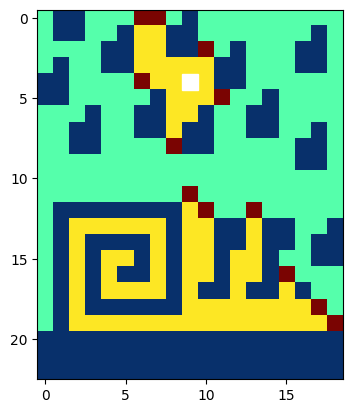

In [27]:
# import pandas as pd
import matplotlib.pyplot as plt
import pulp as pl
from matplotlib.patches import Rectangle
import numpy as np

day_file_path = './maps/day5.csv'

wall_budget = 12

puzz = pd.read_csv(day_file_path, header=None, dtype = str)
puzz.fillna("0", inplace = True)

#note the source horse location
# # source = puzz.replace({'s':1,'1':0}).astype(int).to_numpy()
# s_col = 10
# s_row = 10
[[s_row, s_col]] = np.argwhere(puzz == 's')

water = puzz.replace({'s':'0'}).astype(int).to_numpy()
# plt.imshow(water, cmap='GnBu')
# plt.title("water spots")




# mark water walls
water = puzz.replace({'s':0}).astype(int).to_numpy()


#get dimensions
no_rows, no_cols = water.shape

#create model
model = pl.LpProblem("Enclose.Horse", pl.LpMaximize)

#create variables to solve
#whether to build a wall at this node
build_wall = {
    (row, col):pl.LpVariable(
        f"wall_{row}_{col}",
        0,
        1,
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#define reachability from source as a variable
reachable = {
    (row,col):pl.LpVariable(
        f"reach_{row}_{col}",
        0,
        1, 
        cat = "Binary"
    )
    for col in range(no_cols)
    for row in range(no_rows)
}

#force reachability at the source
model += reachable[(s_row, s_col)] == 1
# #force no wall at the source
model += build_wall[(s_row, s_col)] == 0

# no need to add a sink at infinity. setting all edges as unreachable handles this. assume that all squares
#outside the game board are clear, no walls.
# #add in a sink at infinity
# reachable.update(
#     f"reach_inf",
#     0,
#     1,
#     cat = "Binary"
# )



#objective: maximize reachability
# model += pl.lpSum(reachable.values())
model.setObjective(pl.lpSum(reachable.values()))

#budget
model += pl.lpSum(build_wall.values()) <= wall_budget

#square-local constraints
for col in range(no_cols):
    for row in range(no_rows):
        model += reachable[(row,col)] + build_wall[(row,col)] <= 1
        if water[row,col]:
            #force nonreachability to water spots
            model += reachable[(row,col)] == 0
            #force nonbuildability to water spots
            model += build_wall[(row,col)] == 0
        #force nonreachability to all edges
        if row == 0 or row == no_rows-1 or col == 0 or col == no_cols-1:
            model += reachable[(row,col)] == 0

#intersquare constraints
for col in range(no_cols-1):
    for row in range(no_rows-1):
        #two adjacent BUILDABLE squares cannot both be reached if a wall occupies either of them
        if not water[(row,col)]:
            if not water[(row,col+1)]:
                model += reachable[(row,col+1)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
                model += reachable[(row,col)] - reachable[(row,col+1)] <= build_wall[(row,col)] + build_wall[(row, col+1)]
            if not water[(row+1,col)]:
                model += reachable[(row+1,col)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]
                model += reachable[(row,col)] - reachable[(row+1,col)] <= build_wall[(row,col)] + build_wall[(row+1, col)]
            # if col > 0 and not water[(row,col-1)]:
            #     model += reachable[(row,col-1)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row, col-1)]
            #     model += reachable[(row,col)] - reachable[(row,col-1)] <= build_wall[(row,col)] + build_wall[(row, col-1)]
            # if row > 0 and not water[(row-1,col)]:
            #     model += reachable[(row-1,col)] - reachable[(row,col)] <= build_wall[(row,col)] + build_wall[(row-1, col)]
            #     model += reachable[(row,col)] - reachable[(row-1,col)] <= build_wall[(row,col)] + build_wall[(row-1, col)]

model.solve(pl.PULP_CBC_CMD(msg = True))




#make an np array of the resulting pulp variables
wall_np = np.array([
    [
        pl.value(
            build_wall[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])

reachable_np = np.array([
    [
        pl.value(
           reachable[(row,col)]
        )
        for col in range(no_cols)
    ]
        for row in range(no_rows)
])

#plot the result
fig, ax = plt.subplots()

ax.set_facecolor("#55FFAB")

water_masked = np.ma.masked_where(water == 0, water)
wall_masked = np.ma.masked_where(wall_np == 0, wall_np)
reachable_masked = np.ma.masked_where(reachable_np == 0, reachable_np)

ax.imshow(water_masked, vmin = 0, vmax = 1, cmap = "Blues")
ax.imshow(wall_masked, vmin = 0, vmax = 1, cmap = "turbo")
ax.imshow(reachable_masked, vmin=0, vmax=1)

#print da horse
ax.add_patch(
    Rectangle(
        (s_col-.5,s_row-.5),
        1,
        1,
        color = 'white'
    )
)

plt.show()

model_status = pl.LpStatus[model.status] 

assert model_status == 'Optimal', f"Model status: {model_status}"